# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# EXPLORATORY DATA ANALYSIS

In [2]:
pdata = pd.read_csv('Data - Parkinsons.csv')

In [3]:
pdata.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
pdata.shape

(195, 24)

In [5]:
pdata.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [6]:
pdata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [7]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [8]:
pdata.groupby(["status"]).count()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
1,147,147,147,147,147,147,147,147,147,147,...,147,147,147,147,147,147,147,147,147,147


# Comments:
* As we can see that data is slightly imbalanced so the value of specificity is the best measure of predicting how good our model is.

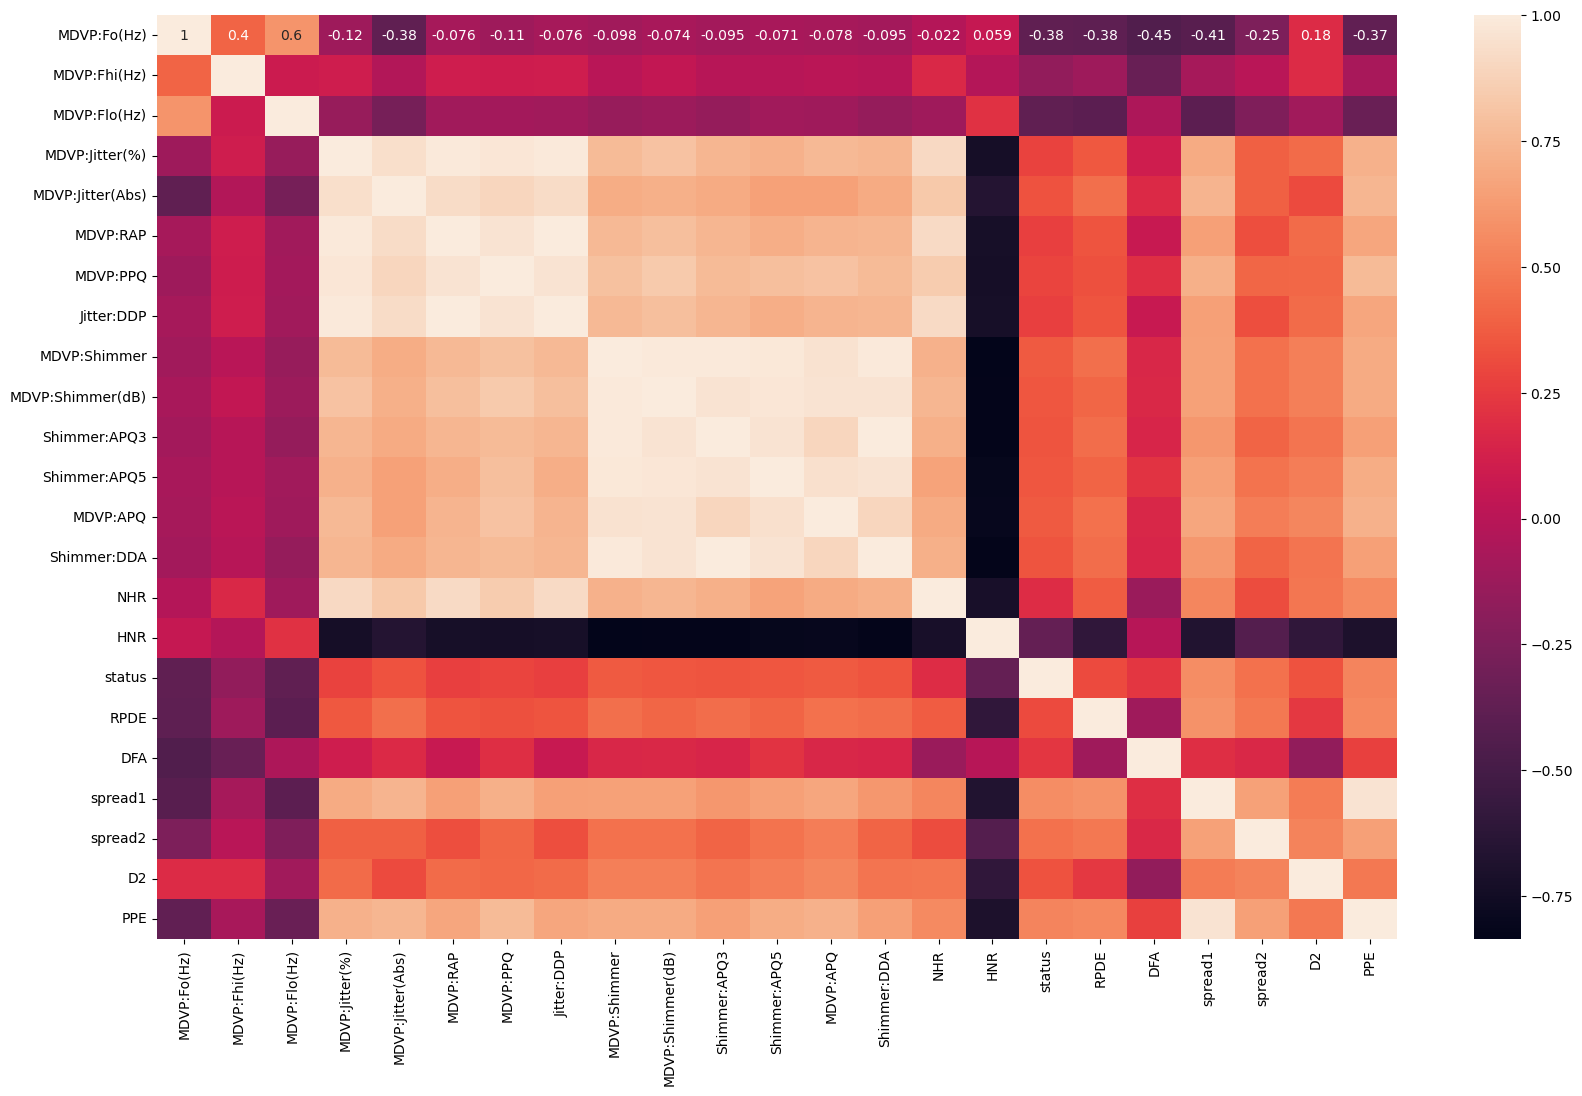

In [9]:
# Exclude non-numeric columns before computing correlation
numeric_columns = pdata.select_dtypes(include=[np.number]).columns
correlation_matrix = pdata[numeric_columns].corr()

# Plot correlation matrix
sns.set_context(font_scale=1.0, rc={"lines.linewidth": 3.5})
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix, annot=True)
plt.show()


# Observations
* We can observe that there is a weak positive correlation between all the three non linear measurements of fundamental frequency ie, spread1, spread2 and PPE with that of status.
* MDVP:Jitter % has high degree of correlation with attributes such as Jitter:DDP,MDVP.PPQ,MDVP:RAP,MDVP:JITTER(Abs),NHR this may be because they are used in calculation of MDVP:Jitter % directly or indirectly.
* Amplitude measures such as MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA are highly correlated.
* Noise components such as NNR, HNR have strong positve and negetive correlation respectively with frequency and amplitude measures.  


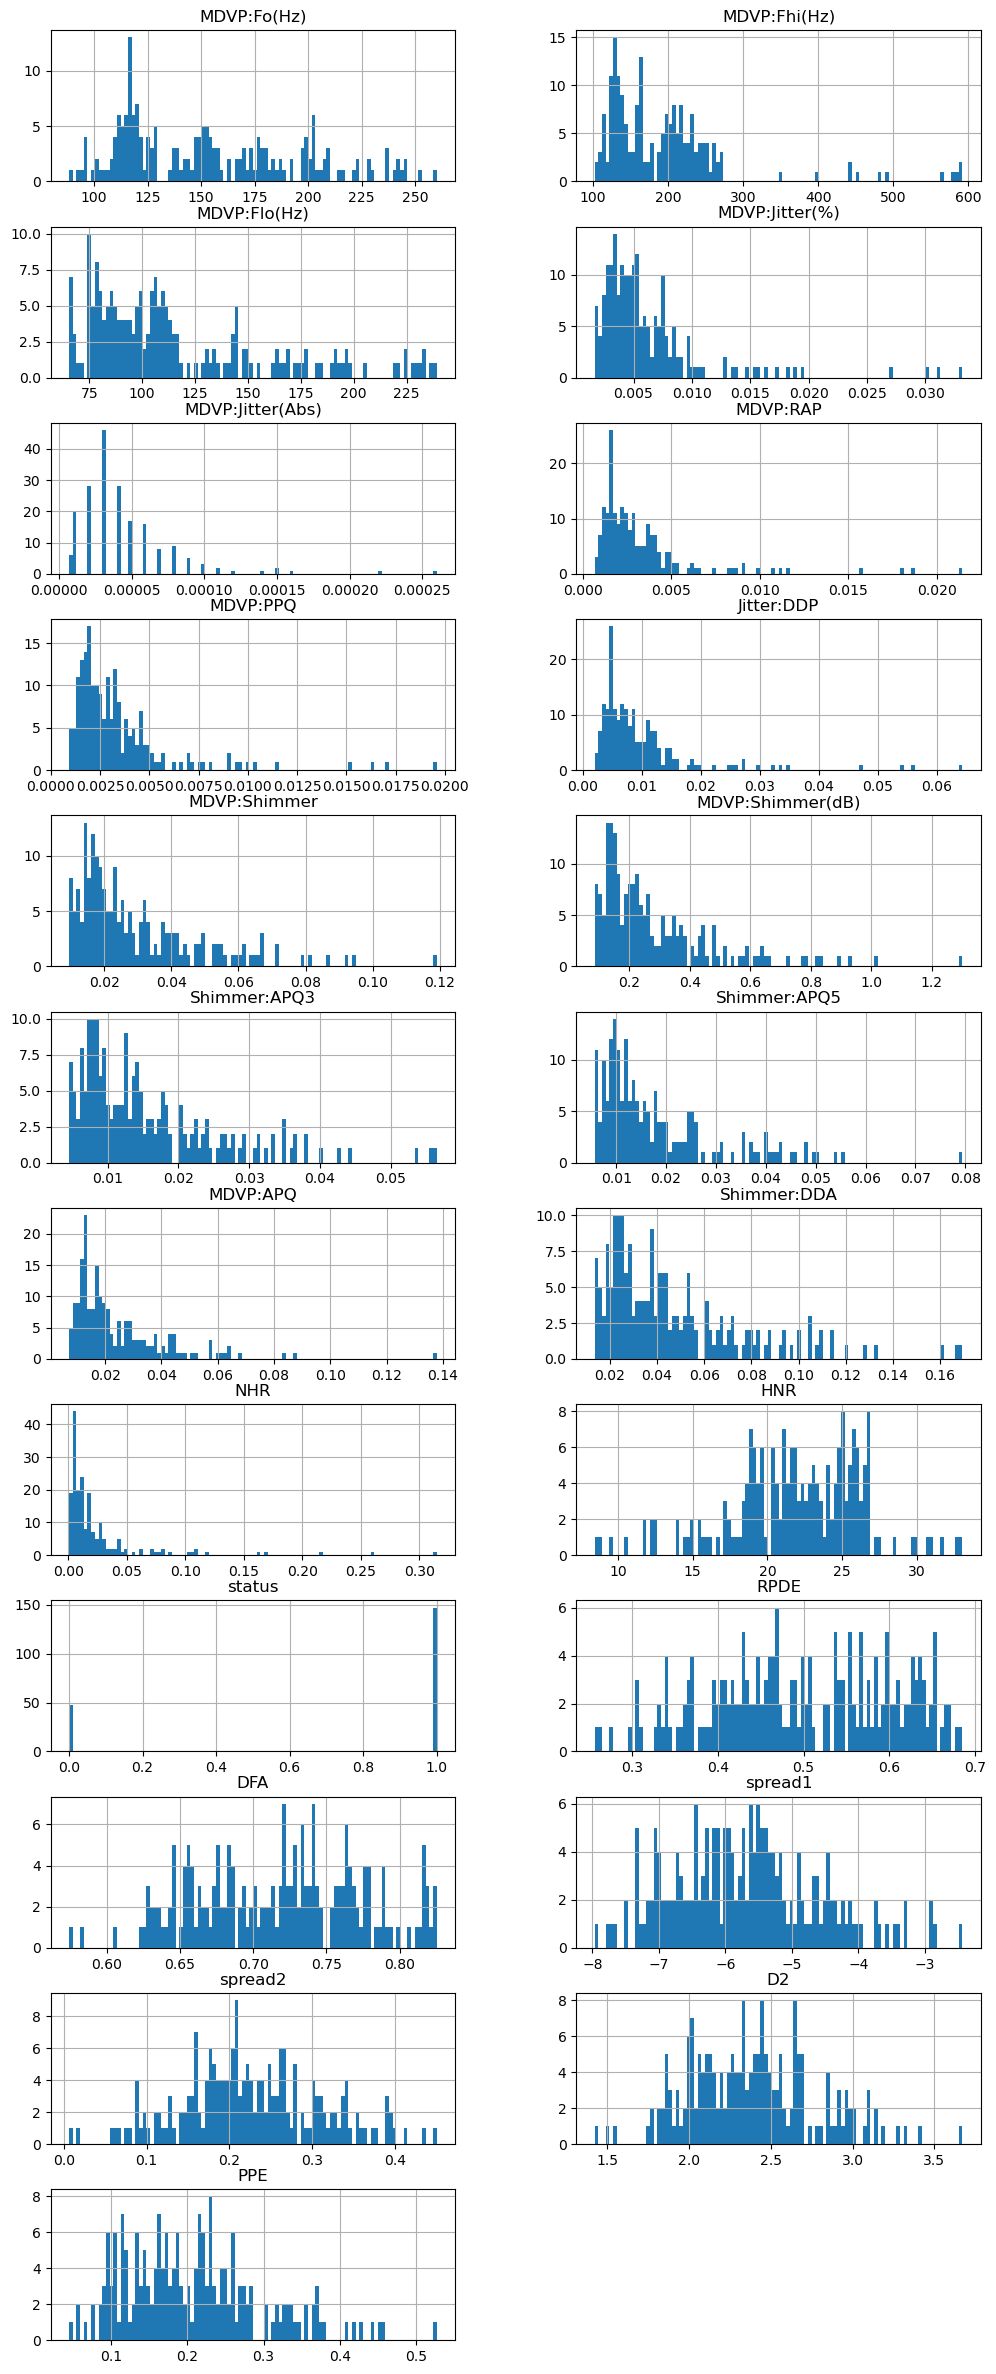

In [10]:
coloumns=list(pdata)[:]
pdata[coloumns].hist(stacked=False, bins=100, figsize=(12,30),layout=(12,2));


# Observations:
* Both Frequency and amplitude attributes are sqewed to the left.
* Only spread 2 is normally distributed.

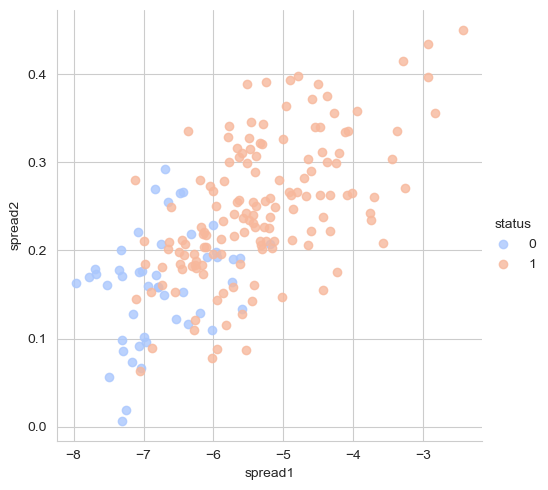

In [11]:
sns.set_style('whitegrid')
sns.lmplot(x='spread1',y='spread2',data=pdata, hue='status', palette='coolwarm',fit_reg=False);

# Observations
* From the previous histogram we can say that spread 2 is normally distributed and there are many people who have their spread 2 value between 0.1 to 0.3
* Spread 1 data is slightly skewed to the left which means there are many people whose spread 2 value fall in the range -7 to -4
* From the Lm plot we can say that people with spread1 value -7 to-4 and spread 2 value 0.1 to 0.4 are having higher probability of getting parkinsons


<Axes: xlabel='status', ylabel='NHR'>

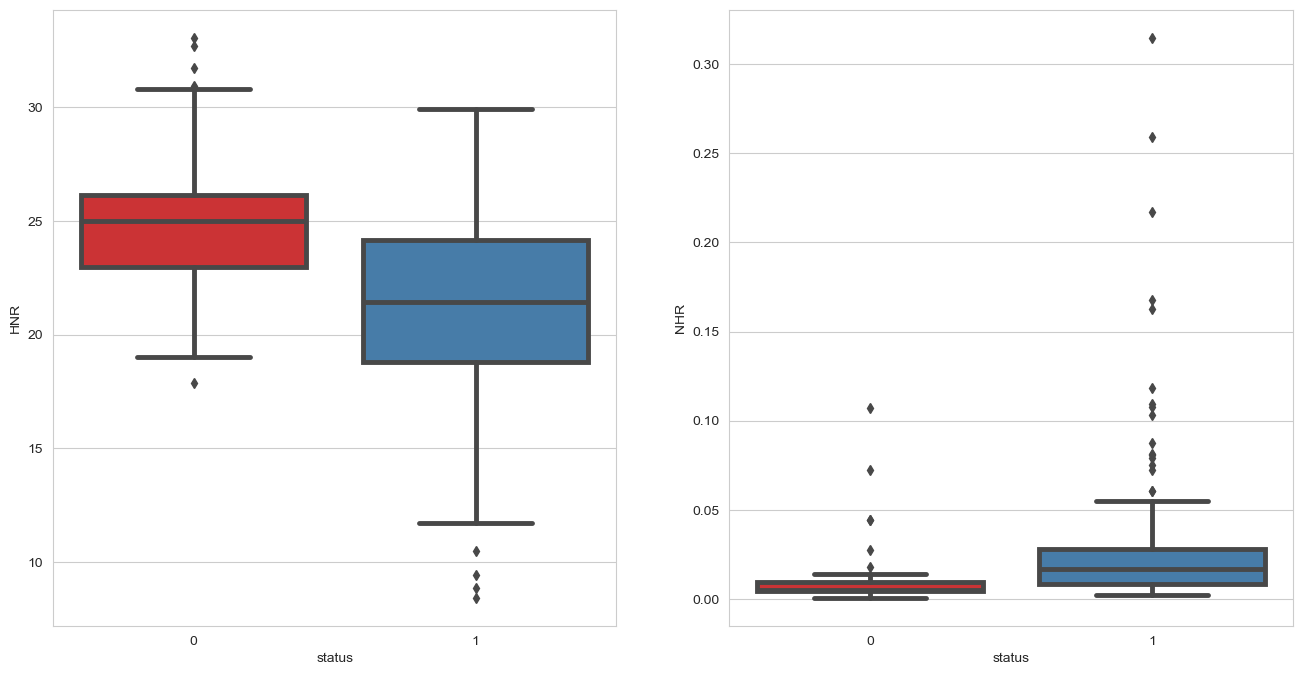

In [12]:
fig, ax = plt.subplots(ncols=2,figsize=(16,8))
sns.boxplot(x='status',y='HNR',data=pdata,palette="Set1",ax=ax[0])
sns.boxplot(x='status',y='NHR',data=pdata,palette="Set1",ax=ax[1])

# Observations
* People with high values of NHR and low values of HNR are having higher probability of getting Parkinson disease.

<Axes: xlabel='status', ylabel='MDVP:Shimmer'>

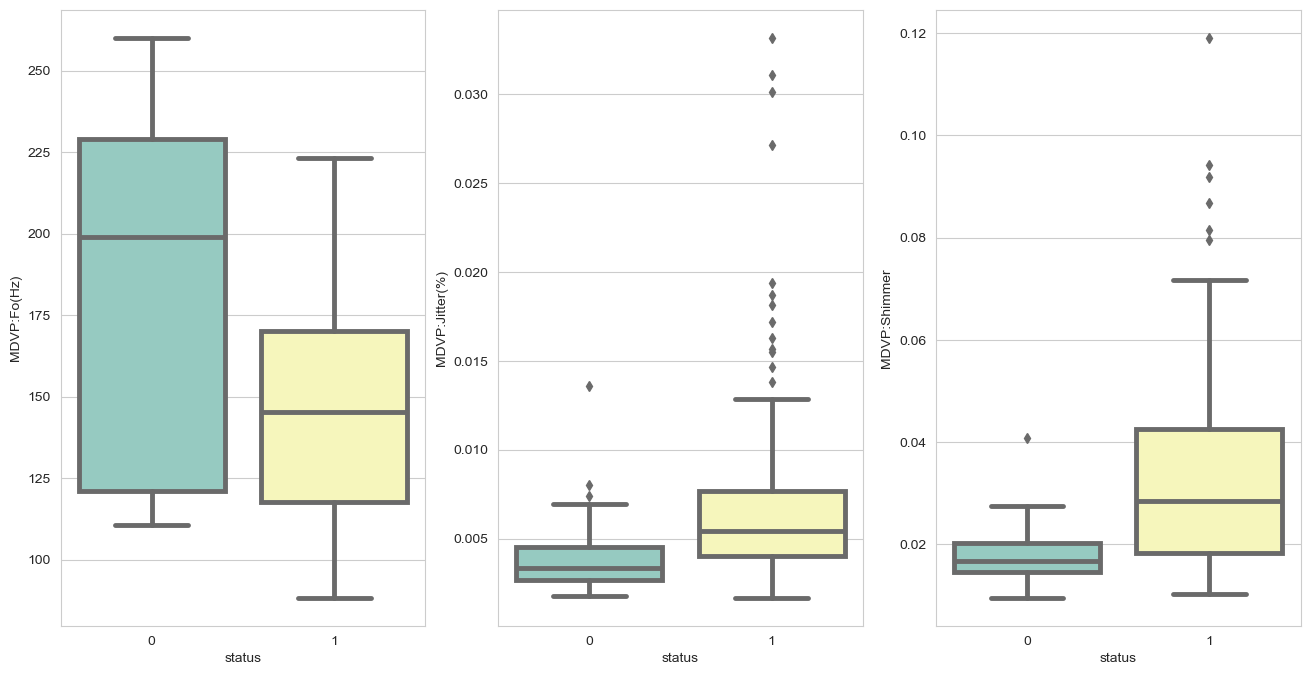

In [13]:
fig, ax = plt.subplots(ncols=3,figsize=(16,8))
sns.boxplot(x='status',y='MDVP:Fo(Hz)',data=pdata,palette="Set3",ax=ax[0])
sns.boxplot(x='status',y='MDVP:Jitter(%)',data=pdata,palette="Set3",ax=ax[1])
sns.boxplot(x='status',y='MDVP:Shimmer',data=pdata,palette="Set3",ax=ax[2])

# Observations
* People with parkinsons have Median value of Average vocal fundamental frequency of arround 145Hz where as people who donot have parkinson has arround 200Hz.
* People with higher values of jitter %(Fundamental Frequency parameter) and MDVP Shimmer(Amplitude Parameter) values has higher probability of getting the disease. 
    
    

# Splitting the data into test and train

In [14]:
from sklearn.model_selection import train_test_split
pdata=pdata.drop(['name'], axis=1)

In [15]:
pdata.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [16]:
X=pdata.drop(['status'],axis=1)
y=pdata[['status']]

In [17]:
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [18]:
y.head()

,status
0,1
1,1
2,1
3,1
4,1


In [19]:
from scipy.stats import zscore
XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
count,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,...,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02
mean,2.960595e-17,-2.277381e-16,1.047595e-16,1.821904e-17,9.109522e-17,-1.275333e-16,6.376666e-17,7.287618e-17,2.368476e-16,-1.639714e-16,...,-6.832142e-17,-1.693802e-16,1.093143e-16,8.198570e-16,-1.093143e-16,6.558856e-16,1.202457e-15,-1.138690e-16,-5.921189e-16,1.366428e-17
std,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,...,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00
min,-1.596162e+00,-1.040581e+00,-1.171366e+00,-9.389487e-01,-1.064103e+00,-8.872543e-01,-9.180440e-01,-8.873331e-01,-1.072340e+00,-1.014787e+00,...,-9.993055e-01,-1.097815e+00,-6.002051e-01,-3.045707e+00,-2.333888e+00,-2.605676e+00,-2.097268e+00,-2.647338e+00,-2.510472e+00,-1.802384e+00
25%,-8.879183e-01,-6.820590e-01,-7.379376e-01,-5.708520e-01,-6.898141e-01,-5.561906e-01,-5.764609e-01,-5.557071e-01,-7.020291e-01,-6.881025e-01,...,-6.508513e-01,-7.326182e-01,-4.693595e-01,-6.089102e-01,-7.449206e-01,-7.852617e-01,-7.041503e-01,-6.269844e-01,-7.404100e-01,-7.687420e-01
50%,-1.317379e-01,-2.331437e-01,-2.766579e-01,-2.647942e-01,-4.018994e-01,-2.724216e-01,-2.748504e-01,-2.736279e-01,-3.583019e-01,-3.151160e-01,...,-3.444009e-01,-2.841460e-01,-3.271036e-01,4.508553e-02,-2.490033e-02,7.527941e-02,-3.353960e-02,-9.166005e-02,-5.315145e-02,-1.390580e-01
75%,6.913210e-01,2.969710e-01,5.458200e-01,2.366858e-01,4.618447e-01,1.785683e-01,1.848331e-01,1.784870e-01,4.346898e-01,3.485429e-01,...,3.146448e-01,4.543110e-01,1.966835e-02,7.225273e-01,8.587132e-01,7.932500e-01,5.869042e-01,6.337615e-01,6.668912e-01,5.165137e-01
max,2.564598e+00,4.327631e+00,2.829908e+00,5.570985e+00,6.220139e+00,6.125892e+00,5.862742e+00,6.126923e+00,4.751617e+00,5.246243e+00,...,6.726438e+00,4.029746e+00,7.192738e+00,2.528321e+00,1.800007e+00,1.942048e+00,2.989093e+00,2.692370e+00,3.376831e+00,3.569059e+00


In [20]:
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.30, random_state=1)

In [21]:
print("Total no of people affected by Parkinsons disease    : {0} ({1:0.2f}%)".format(len(pdata.loc[pdata['status'] == 1]), (len(pdata.loc[pdata['status'] == 1])/len(pdata.index)) * 100))
print("Total no of people not affected by Parkinsons disease  : {0} ({1:0.2f}%)".format(len(pdata.loc[pdata['status'] == 0]), (len(pdata.loc[pdata['status'] == 0])/len(pdata.index)) * 100))
print("")
print("Training Data: people affected by Parkinsons disease   : {0} ({1:0.2f}%)".format(len(y_train[y_train['status'] == 1]), (len(y_train[y_train['status'] == 1])/len(y_train)) * 100))
print("Training Data: people not affected  by Parkinsons disease   : {0} ({1:0.2f}%)".format(len(y_train[y_train['status'] == 0]), (len(y_train[y_train['status'] == 0])/len(y_train)) * 100))
print("")
print("Testing data: people affected by Parkinsons disease      : {0} ({1:0.2f}%)".format(len(y_test[y_test['status'] == 1]), (len(y_test[y_test['status'] == 1])/len(y_test)) * 100))
print("Testing data: people not affected by Parkinsons disease      : {0} ({1:0.2f}%)".format(len(y_test[y_test['status'] == 0]), (len(y_test[y_test['status'] == 0])/len(y_test)) * 100))
print("")

Total no of people affected by Parkinsons disease    : 147 (75.38%)
Total no of people not affected by Parkinsons disease  : 48 (24.62%)

Training Data: people affected by Parkinsons disease   : 107 (78.68%)
Training Data: people not affected  by Parkinsons disease   : 29 (21.32%)

Testing data: people affected by Parkinsons disease      : 40 (67.80%)
Testing data: people not affected by Parkinsons disease      : 19 (32.20%)



# I: Predicting values by "K Nearest Neibhour Method"

In [22]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance' )

In [23]:
NNH.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [24]:
y_predict = NNH.predict(X_test)

In [25]:
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.864406779661017

In [26]:
predicted_labels = NNH.predict(X_test)
NNH_score = NNH.score(X_test, y_test)
print('The KNN model score is',NNH_score)

The KNN model score is 0.864406779661017


<Axes: >

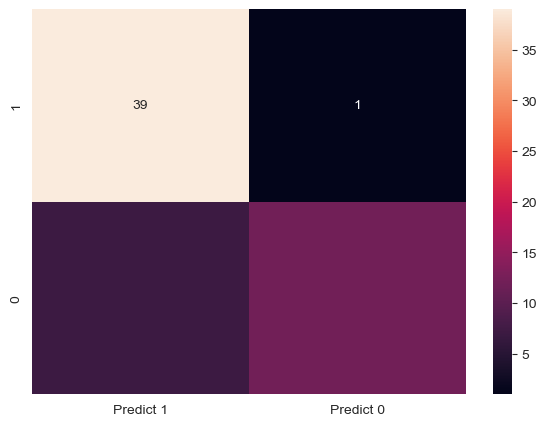

In [27]:
cm1=metrics.confusion_matrix(y_test, predicted_labels, labels=[1,0])
df_cm1 = pd.DataFrame(cm1, index = [i for i in ['1','0']],
                     columns = [i for i in ['Predict 1','Predict 0']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm1, annot=True)

In [28]:
print(metrics.confusion_matrix(y_test, y_predict))

[[12  7]
 [ 1 39]]


In [29]:
TP1=39
TN1=12
FN1=1
FP1=7
print('ACCURACY of model is: ',(TP1+TN1)/float(TP1+TN1+FN1+FP1)*100)
print('SENSITIVITY of the model is: ',TP1 / float(TP1 + FN1)*100)
print('SPECIFICITY of the model is:',TN1 / float(TN1 + FP1)*100)
print('FALSE POSITIVE RATE of the model is: ',FP1 / float(TN1 + FP1)*100)
print('PRECISION of the model is: ',TP1 / float(TP1 + FP1)*100)

ACCURACY of model is:  86.4406779661017
SENSITIVITY of the model is:  97.5
SPECIFICITY of the model is: 63.1578947368421
FALSE POSITIVE RATE of the model is:  36.84210526315789
PRECISION of the model is:  84.78260869565217


In [30]:
print("Classification Report")
print(metrics.classification_report(y_test, y_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.85      0.97      0.91        40
           0       0.92      0.63      0.75        19

    accuracy                           0.86        59
   macro avg       0.89      0.80      0.83        59
weighted avg       0.87      0.86      0.86        59



# Comments:
* As we can observe that the model has very high sensitivity but speficity is not as good because of which the model accuracy has been reduced.
* This model has predicted false positives 7 times ie, it has dioganised people who are not suffering from parkinsons as suffering from parkinsons 7 times.

# II: Predicting values by "Logistic regression"

In [31]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train.values.ravel())
y_predict = model.predict(X_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1        2         3         4         5         6  \
0 -0.587161 -0.343231 -0.07146 -0.548654 -0.544395  0.356843 -0.185383   

          7         8         9  ...        13        14        15        16  \
0  0.357055  0.205411  0.209142  ...  0.051186 -0.191482 -0.044076 -0.197664   

         17        18        19        20        21  intercept  
0  0.256656  0.927061  0.101524  1.048216  0.644892     2.1418  

[1 rows x 23 columns]


In [32]:
model_score1 = model.score(X_train, y_train)
print("Training model score:",model_score1)

Training model score: 0.9044117647058824


In [33]:
model_score = model.score(X_test, y_test)
print('The logistic regression model score is',model_score)

The logistic regression model score is 0.8135593220338984


<Axes: >

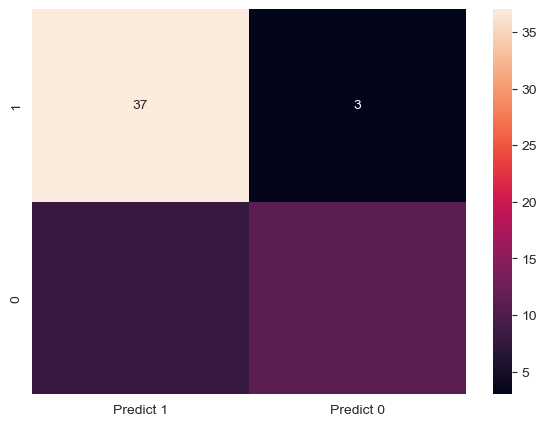

In [34]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1,0])
df_cm = pd.DataFrame(cm, index = [i for i in ['1','0']],
                     columns = [i for i in ['Predict 1','Predict 0']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [35]:
print(metrics.confusion_matrix(y_test, y_predict))

[[11  8]
 [ 3 37]]


In [36]:
TP2=37
TN2=11
FN2=3
FP2=8
print('ACCURACY of model is: ',(TP2+TN2)/float(TP2+TN2+FN2+FP2)*100)
print('SENSITIVITY of the model is: ',TP2 / float(TP2 + FN2)*100)
print('SPECIFICITY of the model is:',TN2 / float(TN2 + FP2)*100)
print('FALSE POSITIVE RATE of the model is: ',FP2 / float(TN2 + FP2)*100)
print('PRECISION of the model is: ',TP2 / float(TP2 + FP2)*100)

ACCURACY of model is:  81.35593220338984
SENSITIVITY of the model is:  92.5
SPECIFICITY of the model is: 57.89473684210527
FALSE POSITIVE RATE of the model is:  42.10526315789473
PRECISION of the model is:  82.22222222222221


In [37]:
print("Classification Report")
print(metrics.classification_report(y_test, y_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.82      0.93      0.87        40
           0       0.79      0.58      0.67        19

    accuracy                           0.81        59
   macro avg       0.80      0.75      0.77        59
weighted avg       0.81      0.81      0.80        59



# Comments:
* As we can observe the model has performed worse than KNN this may be because the data is more distributed and we cannot see high degree of correlation between any of the attribute with that of status

# III: Predicting values by "Support Vector Machine"

In [38]:
from sklearn import svm
svmmodel = svm.SVC(gamma=0.1, C=10)   


In [39]:
svmmodel.fit(X_train , y_train.values.ravel())

SVC(C=10, gamma=0.1)

In [40]:
y_predicted = svmmodel.predict(X_test)

In [41]:
svmmodel_score1 = svmmodel.score(X_train, y_train)
print("Training model score:",svmmodel_score1)

Training model score: 1.0


In [42]:
svmmodel_score = svmmodel.score(X_test, y_test)
print('The SVM Model score is',svmmodel_score)

The SVM Model score is 0.8983050847457628


<Axes: >

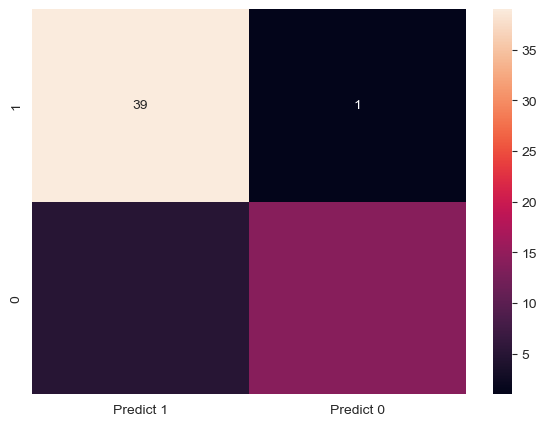

In [43]:
cm=metrics.confusion_matrix(y_test, y_predicted, labels=[1,0])
df_cm = pd.DataFrame(cm, index = [i for i in ['1','0']],
                     columns = [i for i in ['Predict 1','Predict 0']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [44]:
TP3=39
TN3=14
FN3=1
FP3=5
print('ACCURACY of model is: ',(TP3+TN3)/float(TP3+TN3+FN3+FP3)*100)
print('SENSITIVITY of the model is: ',TP3 / float(TP3 + FN3)*100)
print('SPECIFICITY of the model is:',TN3 / float(TN3 + FP3)*100)
print('FALSE POSITIVE RATE of the model is: ',FP3 / float(TN3 + FP3)*100)
print('PRECISION of the model is: ',TP3 / float(TP3 + FP3)*100)

ACCURACY of model is:  89.83050847457628
SENSITIVITY of the model is:  97.5
SPECIFICITY of the model is: 73.68421052631578
FALSE POSITIVE RATE of the model is:  26.31578947368421
PRECISION of the model is:  88.63636363636364


In [45]:
print("Classification Report")
print(metrics.classification_report(y_test, y_predicted, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.89      0.97      0.93        40
           0       0.93      0.74      0.82        19

    accuracy                           0.90        59
   macro avg       0.91      0.86      0.88        59
weighted avg       0.90      0.90      0.89        59



# Comments:
* As we can see there is slight problem of overfitting here 
* Even though the model performs good on training data it fails in testing data

# IV: Training a Meta classfier model 


In [46]:
from sklearn.datasets import make_classification
from sklearn import model_selection
from mlxtend.classifier import StackingCVClassifier
from sklearn.svm import NuSVC, SVC

ModuleNotFoundError: No module named 'mlxtend'

In [ ]:
classifier1=svmmodel
classifier2=model
classifier3=NNH

In [ ]:
sclf = StackingCVClassifier(classifiers = [classifier1, classifier2, classifier3],
                            shuffle = False,
                            cv = 3,
                            meta_classifier = SVC(probability = True))

In [ ]:
sclf.fit(X_train, y_train.values.ravel())

In [ ]:
y_pred = sclf.predict(X_test)

In [ ]:
stacking_score = sclf.score(X_test, y_test)
print('The Stacking model score is',stacking_score)

In [ ]:
cm=metrics.confusion_matrix(y_test, y_pred, labels=[1,0])
df_cm = pd.DataFrame(cm, index = [i for i in ['1','0']],
                     columns = [i for i in ['Predict 1','Predict 0']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [ ]:
TP4=39
TN4=13
FN4=1
FP4=6
print('ACCURACY of model is: ',(TP4+TN4)/float(TP4+TN4+FN4+FP4)*100)
print('SENSITIVITY of the model is: ',TP4 / float(TP4 + FN4)*100)
print('SPECIFICITY of the model is:',TN4 / float(TN4 + FP4)*100)
print('FALSE POSITIVE RATE of the model is: ',FP4 / float(TN4 + FP4)*100)
print('PRECISION of the model is: ',TP4 / float(TP4 + FP4)*100)

In [ ]:
print("Classification Report")
print(metrics.classification_report(y_test, y_pred, labels=[1, 0]))

In [ ]:
print('The KNN model score is \n',NNH_score)
print('The logistic regression model score is\n',model_score)
print('The SVM Model score is\n',svmmodel_score)
print('The Stacking model score is\n',stacking_score)




# Comments:
* As we can observe that there is a significant increase in meta classifier accuracy than that of KNN and SVM Model.
* Support Vector machine has better accuracy than Meta classifier.
* Hence SVM is doing better in terms of accuracy as well as specificity than that of Meta Classifier.
* So SVM can be chosen over Meta classifier.

# V Predicting by Decision Tree Classifer

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion = 'entropy', random_state=1)
dTree.fit(X_train, y_train)

In [ ]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

# Comments:
* As we can see model is slightly over fitting so we can increase accuracy by reducing number of branches in decision tree.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fn = list(X_train)
cn = ['No', 'Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=500)
plot_tree(dTree, feature_names = fn, class_names=cn, filled = True)

fig.savefig('tree.png')

In [ ]:
dTreeR = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))
dtreeRScore=dTreeR.score(X_test, y_test)

# Comments:
* As we can see there is significant amount of increase in accuracy than the previous tree with 5 branches


# Confusion Matrix for decision tree with 5 branches:

In [ ]:
ytree_pred = dTree.predict(X_test)
ytree_pred1= dTreeR.predict(X_test)

In [ ]:
cm=metrics.confusion_matrix(y_test, ytree_pred, labels=[1,0])
df_cm = pd.DataFrame(cm, index = [i for i in ['1','0']],
                     columns = [i for i in ['Predict 1','Predict 0']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [ ]:
TP=39
TN=12
FN=1
FP=7
print('ACCURACY of model is: ',(TP+TN)/float(TP+TN+FN+FP)*100)
print('SENSITIVITY of the model is: ',TP / float(TP + FN)*100)
print('SPECIFICITY of the model is:',TN / float(TN + FP)*100)
print('FALSE POSITIVE RATE of the model is: ',FP / float(TN + FP)*100)
print('PRECISION of the model is: ',TP / float(TP + FP)*100)

# Confusion Matrix for decision tree with 3 branches:

In [ ]:
cm=metrics.confusion_matrix(y_test, ytree_pred1, labels=[1,0])
df_cm = pd.DataFrame(cm, index = [i for i in ['1','0']],
                     columns = [i for i in ['Predict 1','Predict 0']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [ ]:
TP5=38
TN5=15
FN5=2
FP5=4
print('ACCURACY of model is: ',(TP5+TN5)/float(TP5+TN5+FN5+FP5)*100)
print('SENSITIVITY of the model is: ',TP5 / float(TP5 + FN5)*100)
print('SPECIFICITY of the model is:',TN5 / float(TN5 + FP5)*100)
print('FALSE POSITIVE RATE of the model is: ',FP5 / float(TN5 + FP5)*100)
print('PRECISION of the model is: ',TP5 / float(TP5 + FP5)*100)

# Comments:
* As we can observe that there is not only increase in accuracy but also Specificity of the model and hence Decision Tree Classifier with 3 branches perform better.

# VI Predicting by Random Forest Classifer

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 40,random_state=1)
rfcl = rfcl.fit(X_train, y_train.values.ravel())
yrf_pred = rfcl.predict(X_test)
rfcl.score(X_test , y_test)

In [ ]:
cm=metrics.confusion_matrix(y_test, yrf_pred, labels=[1,0])
df_cm = pd.DataFrame(cm, index = [i for i in ['1','0']],
                     columns = [i for i in ['Predict 1','Predict 0']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [ ]:
TP6=39
TN6=12
FN6=1
FP6=7
print('ACCURACY of model is: ',(TP6+TN6)/float(TP6+TN6+FN6+FP6)*100)
print('SENSITIVITY of the model is: ',TP6 / float(TP6 + FN6)*100)
print('SPECIFICITY of the model is:',TN6 / float(TN6 + FP6)*100)
print('FALSE POSITIVE RATE of the model is: ',FP6 / float(TN6 + FP6)*100)
print('PRECISION of the model is: ',TP6/ float(TP6 + FP6)*100)

# Comments:
* As compared to decision tree random forest classifier is not performing better also specificity of the model is also low so Decision tree is better than random forest

In [ ]:
print('The KNN model score is \n',NNH_score)
print('The logistic regression model score is\n',model_score)
print('The SVM Model score is\n',svmmodel_score)
print('The Stacking model score is\n',stacking_score)
print('The Decision tree model score is\n',dtreeRScore)
print('The Random Forest model score is\n',rfcl.score(X_test , y_test))

In [ ]:
print("Classification Report")
print(metrics.classification_report(y_test, yrf_pred, labels=[1, 0]))

# Comments:
* Here 2 models have same accuracy ie, SVM, Decision tree so we can findout which is the better model by plotting ROC Curves 

# Predicting better model based on ROC curves 

In [ ]:
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
random_state = np.random.RandomState(0)

import warnings
warnings.simplefilter('ignore')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
classifier_1 = LogisticRegression(solver="liblinear")
classifier_2 = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance' )
classifier_3 = svm.SVC(gamma=0.1, C=10, probability=True) 
classifier_4 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state=1)
classifier_5 = RandomForestClassifier(n_estimators = 50,random_state=1)
classifier_6 = StackingCVClassifier(classifiers = [classifier1, classifier2, classifier3],
                            shuffle = False,
                            cv = 3,
                            meta_classifier = SVC(probability = True))


probas1_ = classifier_1.fit(X_train, y_train).predict_proba(X_test)
probas2_ = classifier_2.fit(X_train, y_train).predict_proba(X_test)
probas3_ = classifier_3.fit(X_train, y_train).predict_proba(X_test)
probas4_ = classifier_4.fit(X_train, y_train).predict_proba(X_test)
probas5_ = classifier_5.fit(X_train, y_train).predict_proba(X_test)
probas6_ = classifier_6.fit(X_train, y_train).predict_proba(X_test)

fpr1, tpr1, thresholds1 = roc_curve(y_test, probas1_[:, 1])
roc_auc1 = auc(fpr1, tpr1)
print("Area under the ROC curve for Logistic regression model is: %f" % roc_auc1)

fpr2, tpr2, thresholds2 = roc_curve(y_test, probas2_[:, 1])
roc_auc2 = auc(fpr2, tpr2)
print("Area under the ROC curve for KNN Model is  : %f" % roc_auc2)

fpr3, tpr3, thresholds3 = roc_curve(y_test, probas3_[:, 1])
roc_auc3 = auc(fpr3, tpr3)
print("Area under the ROC curve for support vector machine model is : %f" % roc_auc3)

fpr4, tpr4, thresholds4 = roc_curve(y_test, probas4_[:, 1])
roc_auc4 = auc(fpr4, tpr4)
print("Area under the ROC curve for Decision tree is : %f" % roc_auc4)

fpr5, tpr5, thresholds5 = roc_curve(y_test, probas5_[:, 1])
roc_auc5 = auc(fpr5, tpr5)
print("Area under the ROC curve Random forest Classifier is: %f" % roc_auc5)

fpr6, tpr6, thresholds6 = roc_curve(y_test, probas6_[:, 1])
roc_auc6 = auc(fpr6, tpr6)
print("Area under the ROC curve Stacking classifier is : %f" % roc_auc6)




# Comments:
* As we can see Area under the curve for Decision tree is lesser than SVM. Since the data is slightly imbalanced the important factor for selecting the model is Specificity.

In [ ]:
print('The KNN model Specificity  is \n',TN1 / float(TN1 + FP1)*100)
print('The logistic regression model Specificity is\n',TN2 / float(TN2 + FP2)*100)
print('The SVM Model Specificity is\n',TN3 / float(TN3 + FP3)*100)
print('The Stacking model Specificity is\n',TN4 / float(TN4 + FP4)*100)
print('The Decision tree model Specificity is\n',TN5 / float(TN5 + FP5)*100)
print('The Random Forest model Specificity is\n',TN6 / float(TN6 + FP6)*100)

# Final Comments:
* As we can see here the specificity of Decision Tree model is better than all the models hence we can say that Decision tree is the best model for this data set.